# BE 3 : Simulation of SDE solutions by different schemes
MESSINA Valentin et MUNOZ Eloi

# Exercice 1

In [15]:
# Question 1

# X_t tend vers zero quand t tend vers l'infini

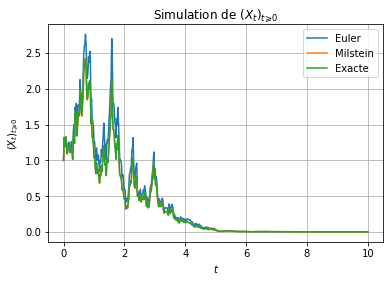

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Question 2

N=500
T=10

def sigma(x):
    return x

def Schemas(sigma,T,N,X0):
    X0=1
    X_N_Milstein=np.zeros(N)
    X_N_Euler=np.zeros(N)
    X_N_Exacte=np.zeros(N)
    X_N_Milstein[0]=X0
    X_N_Euler[0]=X0
    X_N_Exacte[0]=X0
    h=T/N
    DeltaBm = stats.norm.rvs(0,1,size=N)
    for n in range(1,N):
        X_N_Euler[n]=X_N_Euler[n-1]+sigma(X_N_Euler[n-1])*np.sqrt(h)*DeltaBm[n]
        
        X_N_Milstein[n]=X_N_Milstein[n-1] \
        -0.5*X_N_Milstein[n-1]*h \
        +X_N_Milstein[n-1]*np.sqrt(h)*DeltaBm[n] \
        +0.5*X_N_Milstein[n-1]*h*(DeltaBm[n]**2)
        
        
        X_N_Exacte[n]=X_N_Exacte[n-1]*np.exp(np.sqrt(h)*DeltaBm[n]-h/2)        
        
    return X_N_Exacte,X_N_Euler,X_N_Milstein


a=Schemas(sigma,T,N,1)

plt.grid()
plt.plot(np.linspace(0,T,N),a[1],label="Euler")
plt.plot(np.linspace(0,T,N),a[2],label="Milstein")
#plt.plot(np.linspace(0,T,N),a[0],label="Exacte")
plt.xlabel("$t$")
plt.ylabel("$(X_t)_{t\geqslant 0}$")
plt.title("Simulation de $(X_t)_{t\geqslant 0}$")
plt.legend()

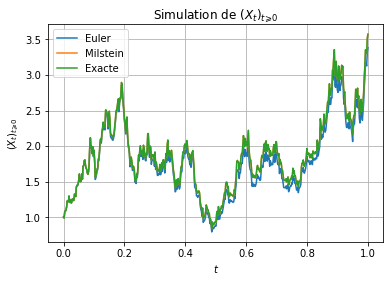

In [50]:
T=1
a=Schemas(sigma,T,N,1)

plt.grid()
plt.plot(np.linspace(0,T,N),a[1],label="Euler")
plt.plot(np.linspace(0,T,N),a[2],label="Milstein")
plt.plot(np.linspace(0,T,N),a[0],label="Exacte")
plt.xlabel("$t$")
plt.ylabel("$(X_t)_{t\geqslant 0}$")
plt.title("Simulation de $(X_t)_{t\geqslant 0}$")
plt.legend()

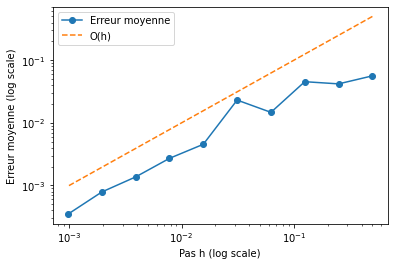

In [52]:
# Question 3
def erreur_mc_euler(M, sigma, T, N, X0):
    total_erreur = 0
    
    for _ in range(M):
        a=Schemas(sigma,T,N,1)
        # Simulation du schéma d'Euler
        euler_simulation = a[1]
        
        # Simulation de la solution exacte
        exact_solution = a[0]
        
        # Calcul de l'erreur quadratique pour cette simulation
        erreur = np.mean((euler_simulation - exact_solution)**2)
        
        # Ajouter l'erreur à la somme totale
        total_erreur += erreur
    
    # Calculer l'erreur moyenne sur toutes les simulations
    erreur_moyenne = total_erreur / M
    
    return erreur_moyenne

# Paramètres
M = 100  # Nombre d'itérations de la méthode de Monte Carlo
T = 1
X0 = 1

# Valeurs de N à tester (pas de 2 à 2^10)
valeurs_N = 2**np.arange(1, 11)

# Initialiser un tableau pour stocker les erreurs
erreurs = []

# Calculer l'erreur moyenne pour chaque valeur de N
for N in valeurs_N:
    erreur_moyenne = erreur_mc_euler(M, sigma, T, N, X0)
    erreurs.append(erreur_moyenne)

# Tracer l'erreur en fonction de N sur une échelle logarithmique
plt.loglog(1 / valeurs_N, erreurs, marker='o', linestyle='-', label='Erreur moyenne')

# Tracer une ligne de référence O(h)
plt.loglog(1 / valeurs_N, 1 / valeurs_N, linestyle='--', label='O(h)')

# Étiqueter l'axe x et y
plt.xlabel('Pas h (log scale)')
plt.ylabel('Erreur moyenne (log scale)')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

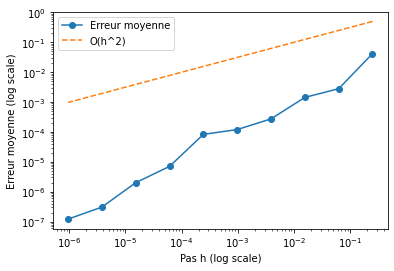

In [55]:
def erreur_mc_milstein(M, sigma, T, N, X0):
    total_erreur = 0
    
    for _ in range(M):
        a=Schemas(sigma,T,N,1)
        # Simulation du schéma d'Euler
        euler_simulation = a[2]
        
        # Simulation de la solution exacte
        exact_solution = a[0]
        
        # Calcul de l'erreur quadratique pour cette simulation
        erreur = np.mean((euler_simulation - exact_solution)**2)
        
        # Ajouter l'erreur à la somme totale
        total_erreur += erreur
    
    # Calculer l'erreur moyenne sur toutes les simulations
    erreur_moyenne = total_erreur / M
    
    return erreur_moyenne

# Paramètres
M = 100  # Nombre d'itérations de la méthode de Monte Carlo
T = 1
X0 = 1

# Valeurs de N à tester (pas de 2 à 2^10)
valeurs_N = 2**np.arange(1, 11)

# Initialiser un tableau pour stocker les erreurs
erreurs = []

# Calculer l'erreur moyenne pour chaque valeur de N
for N in valeurs_N:
    erreur_moyenne = erreur_mc_milstein(M, sigma, T, N, X0)
    erreurs.append(erreur_moyenne)

# Tracer l'erreur en fonction de N sur une échelle logarithmique
plt.loglog(1 / valeurs_N**2, erreurs, marker='o', linestyle='-', label='Erreur moyenne')

# Tracer une ligne de référence O(h)
plt.loglog(1 / valeurs_N**2, 1 / valeurs_N, linestyle='--', label='O(h^2)')

# Étiqueter l'axe x et y
plt.xlabel('Pas h (log scale)')
plt.ylabel('Erreur moyenne (log scale)')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()